# Annotated Data Analysis

***

### Table of Contents

**[1.](#1) Commonly Annotated Words**
    
  [1.1](#1.1) Omission
  
  [1.2](#1.2) Stereotype 
  
  [1.3](#1.3) Generalization

**[2.](#2) Language of Material of Annotations**
    
  [2.1](#2.1) Omission
  
  [2.2](#2.2) Stereotype 
  
  [2.3](#2.3) Generalization

**[3.](#3) Year of Material of Annotations**
    
  3.1 Omission
    
  3.2 Stereotype

**[4.](#4) Type of Annotation per Label (based on annotators' notes)**

  4.1 Omission
  
  4.2 Stereotype

***

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [2]:
metadata = "CRC_units-grouped-by-fonds_clean.csv"
meta_df = pd.read_csv(metadata,index_col=0)
ann_data = "annot_data/aggregated_with_eadid_descid_cols.csv"
data_df = pd.read_csv(ann_data,index_col=0)

In [3]:
# meta_df.head()
# data_df.head()

In [4]:
# FUNCTIONS

def getSubDf(df, label):
    return df.loc[df.label == label]

def makeWordCloud(counter):
    wc = WordCloud(width=800, height=400, max_font_size=160, 
               background_color="white", colormap="viridis").generate_from_frequencies(ann_counter)
    plt.figure(figsize=(16,12))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    return plt

<a id="1"></a>
## 1. Commonly Annotated Words

Determine what the most common text spans are that were annotated with the `Omission` and `Stereotype` labels, and how many of each label were annotated in each metadata field.

<a id="1.1"></a>
### 1.1 Omission

In [11]:
df = getSubDf(data_df, "Omission")
df.shape

(7586, 8)

In [14]:
# df.field.value_counts()

In [73]:
text_series = df.text.value_counts(sort=True,ascending=False)
text_series.head(20)

man          566
woman        246
boy           41
he            36
Thomson       35
boys          34
his           34
Midwifery     31
MA            25
Empress       23
Chairman      21
He            20
M.A.          20
Beale         19
M.B.          19
Man           18
cowboys       17
Duchess       16
Ledermann     15
B.Sc.         15
Name: text, dtype: int64

In [26]:
print("Unique text spans:", text_series.shape[0])

Unique text spans: 3172


In [17]:
ann_counter = Counter(list(df.text))
ann_counter["a woman"]

25

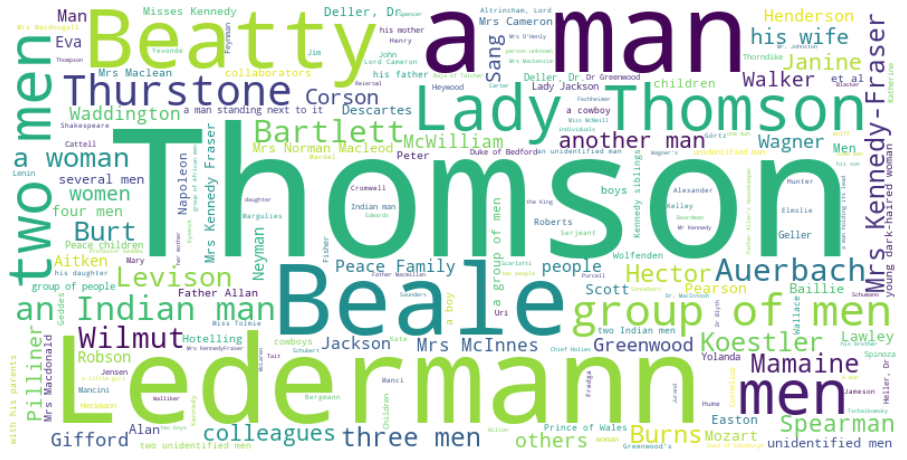

In [33]:
plt = makeWordCloud(ann_counter)

<a id="1.2"></a>
### 1.2 Stereotype

In [35]:
df = getSubDf(data_df, "Stereotype")
df.shape

(2648, 8)

In [36]:
# df.field.value_counts()

In [37]:
text_series = df.text.value_counts(sort=True,ascending=False)
text_series.head(20)

man                                429
men                                342
a man                              223
a woman                            108
woman                               67
two men                             54
women                               49
a group of men                      32
female                              24
Man                                 22
an Indian man                       21
boys                                21
a man and a woman                   21
his                                 20
boy                                 17
his wife Florence Jewel Baillie     16
cowboys                             15
Empress of Britain                  15
three men                           15
Men                                 15
Name: text, dtype: int64

In [38]:
print("Unique text spans:", text_series.shape[0])

Unique text spans: 811


In [39]:
ann_counter = Counter(list(df.text))
ann_counter["a woman"]

108

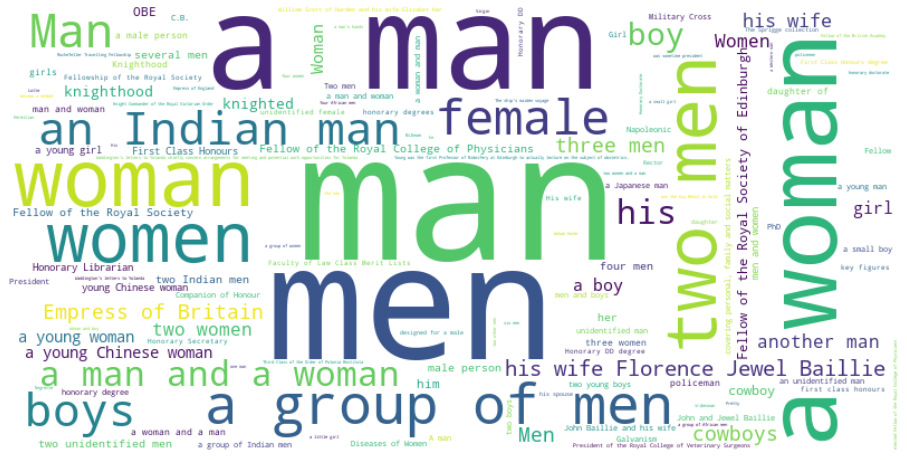

<Figure size 432x288 with 0 Axes>

In [40]:
plt = makeWordCloud(ann_counter)

In [55]:
text_list = list(df.text)
new_list = []
for text_span in text_list:
    text_span_list = text_span.split(" ")
    for t in text_span_list:
        new_list += [t.lower()]
        
print(len(new_list))
print(len(set(new_list)))

7605
1421


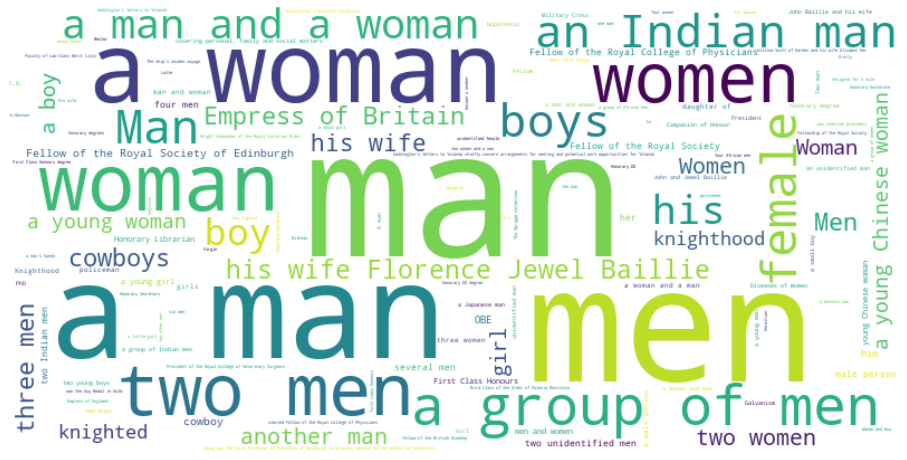

In [56]:
text_counter = Counter(new_list)
plt = makeWordCloud(text_counter)

In [63]:
terms = ["person", "people", "female", "male", "woman", "man", "women", "men", "girls", "boys", "girl", "boy"]
counts = []
for term in terms:
    counts += [text_counter[term]]
df_counts = pd.DataFrame({"term":terms, "count":counts})
df_counts

,term,count
0,person,10
1,people,0
2,female,31
3,male,19
4,woman,273
5,man,794
6,women,115
7,men,555
8,girls,5
9,boys,36


There are more man-related terms than woman-related terms included as stereotypes.  There are far more men represented in the archival metadata descriptions than women, so this is not surprising.

*Note: trans, non-binary, and gender-diverse identities were not found during the annotation process.*

<a id="1.3"></a>
### 1.3 Generalization

In [64]:
df = getSubDf(data_df, "Generalization")
df.shape

(2061, 8)

In [65]:
# df.field.value_counts()

In [66]:
text_series = df.text.value_counts(sort=True,ascending=False)
text_series.head(20)

man          566
woman        246
boy           41
he            36
Thomson       35
boys          34
his           34
Midwifery     31
MA            25
Empress       23
Chairman      21
He            20
M.A.          20
Beale         19
M.B.          19
Man           18
cowboys       17
Duchess       16
Ledermann     15
B.Sc.         15
Name: text, dtype: int64

In [67]:
print("Unique text spans:", text_series.shape[0])

Unique text spans: 480


In [68]:
ann_counter = Counter(list(df.text))
ann_counter["a woman"]

0

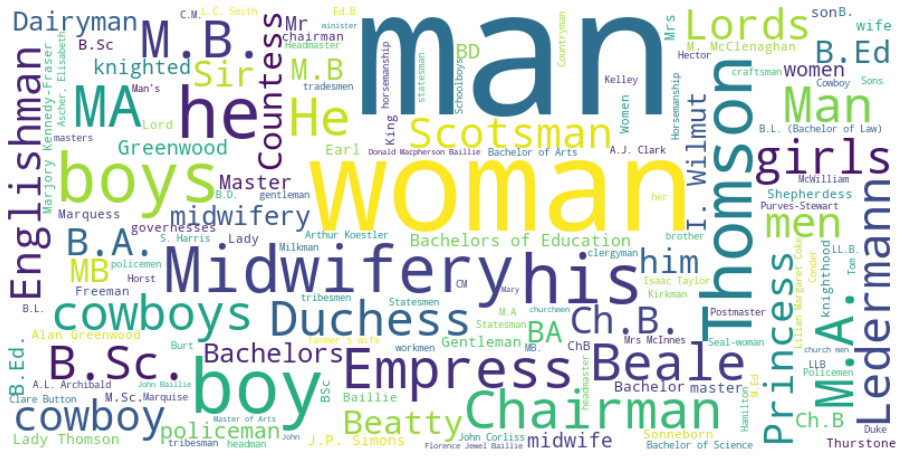

In [70]:
plt = makeWordCloud(ann_counter)